In [1]:
#import dependencies
import matplotlib.pyplot as plt
import numpy as np
import requests
import pandas as pd
import openweathermapy.core as owm
from citipy import citipy
from pprint import pprint

from config import api_key

In [2]:
#collect latitude and longitude data for getting a random city sample
lat = np.random.uniform(-90,90,100) 
lon = np.random.uniform(-180,180,100) 

print (lat)
print (lon)

[-79.91987348  51.35755435  25.59645038 -34.28286766  21.82565451
 -38.65361601 -14.06257448  89.20009882 -84.91870997 -61.24147501
 -64.67457369  40.06466633  14.95924372  -3.17208738  13.37471162
  54.79722499  -8.48668904  83.94805031 -73.18101479 -62.39279926
  76.43665672 -24.50005579  10.46087611 -43.28870301  80.62893231
  82.24270808   9.13593071  64.91584384   9.42148174  65.36099265
  45.10727593 -51.85896516  -0.0979447  -64.25728036  28.74024663
  85.65615984 -75.54962297  22.06998375  17.13932386 -73.20697138
 -55.38509231 -31.57867456 -48.08396137 -71.40808835  18.31371691
 -73.60159715  71.14787707  22.04284819 -17.94004163  -1.79842453
   1.57537092 -74.76337166 -21.95966783 -41.96893751  30.36887598
 -78.75022224  63.1171714   25.9378952   67.57225611  69.38915797
 -68.47955021 -88.03187774 -79.52653383  26.77069374  -0.41363213
 -15.57369512 -63.41690922  25.33012948  88.95388529  31.53758226
 -69.6272899  -46.07702544 -36.41783241  -1.38012201 -11.19263862
  79.99286

In [3]:
#create dataframe for cities located by random lat/lon data
cities_df = pd.DataFrame({"Latitude": lat, "Longitude": lon})
cities_df.head()

,Latitude,Longitude
0,-79.919873,-147.289681
1,51.357554,173.254728
2,25.596450,9.045289
3,-34.282868,109.165215
4,21.825655,72.427089


In [4]:
#add blank columns for random city names, as well as weather data and URL for each city
cities_df["City"] = ""
cities_df["Temperature"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""
cities_df["Humidity"] = ""
cities_df["URL"] = ""

cities_df.head()

,Latitude,Longitude,City,Temperature,Cloudiness,Wind Speed,Humidity,URL
0,-79.919873,-147.289681,,,,,,
1,51.357554,173.254728,,,,,,
2,25.596450,9.045289,,,,,,
3,-34.282868,109.165215,,,,,,
4,21.825655,72.427089,,,,,,


In [5]:
#determine city names using the random lat/lon values

for index, row in cities_df.iterrows():
    latitude = row['Latitude']
    longitude = row ["Longitude"]
    
    cities_df.set_value(index, "City", citipy.nearest_city(latitude, longitude).city_name)
    cities_df.set_value(index, "Country Code", citipy.nearest_city(latitude, longitude).country_code)

cities_df.head()

C:\Users\acave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\acave\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,Latitude,Longitude,City,Temperature,Cloudiness,Wind Speed,Humidity,URL,Country Code
0,-79.919873,-147.289681,mataura,,,,,,pf
1,51.357554,173.254728,nikolskoye,,,,,,ru
2,25.596450,9.045289,gat,,,,,,ly
3,-34.282868,109.165215,busselton,,,,,,au
4,21.825655,72.427089,ghogha,,,,,,in


In [6]:
#set up URL to gather information from openweathermapy
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

#identify desired settings for outputs
settings = {"units": "imperial", "appid": api_key}

In [16]:
for index, row in cities_df.iterrows():
    city = row['City']
    country = row ["Country Code"]
    city_country = str(city)+ "," + str(country)
    
    try:
        #current_weather = owm.get_current(city_country, **settings)
        current_weather_url = url + "&appid=" + api_key + "&q=" + city_country
        current_weather = requests.get(current_weather_url).json()
        #print (current_weather_url)
        
        
        cities_df.set_value(index, "Temperature", current_weather['main']['temp'])
        cities_df.set_value(index, "Humidity", current_weather['main']['humidity'])
        cities_df.set_value(index, "Cloudiness", current_weather['clouds']['all'])
        cities_df.set_value(index, "Wind Speed", current_weather['wind']['speed'])
        cities_df.set_value(index, "URL", current_weather_url)

    
    except:
        cities_df.set_value(index, "Temperature", "No Data from API")
        cities_df.set_value(index, "Humidity", "No Data from API")
        cities_df.set_value(index, "Cloudiness", "No Data from API")
        cities_df.set_value(index, "Wind Speed", "No Data from API")
        cities_df.set_value(index, "URL", "No Data from API")
        print("No Data Available")

cities_df = cities_df[["City", "Country Code", "Latitude", "Longitude","Temperature", "Humidity", "Cloudiness", "Wind Speed", "URL"]]

cities_df.head()

C:\Users\acave\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\acave\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\acave\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\acave\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\acave\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\acave\Anaconda3\lib\s

No Data Available
No Data Available
No Data Available
No Data Available
No Data Available
No Data Available
No Data Available
No Data Available
No Data Available


,City,Country Code,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,URL
0,mataura,pf,-79.919873,-147.289681,No Data from API,No Data from API,No Data from API,No Data from API,No Data from API
1,nikolskoye,ru,51.357554,173.254728,19.4,67,0,2.24,http://api.openweathermap.org/data/2.5/weather...
2,gat,ly,25.596450,9.045289,No Data from API,No Data from API,No Data from API,No Data from API,No Data from API
3,busselton,au,-34.282868,109.165215,65.03,100,12,18.81,http://api.openweathermap.org/data/2.5/weather...
4,ghogha,in,21.825655,72.427089,68.54,51,0,4.94,http://api.openweathermap.org/data/2.5/weather...


In [17]:
#create clean dataframe eliminating entries with no data values for certain variables
clean_cities = cities_df[cities_df["Temperature"]!="No Data from API"]
clean_cities.head()

,City,Country Code,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,URL
1,nikolskoye,ru,51.357554,173.254728,19.4,67,0,2.24,http://api.openweathermap.org/data/2.5/weather...
3,busselton,au,-34.282868,109.165215,65.03,100,12,18.81,http://api.openweathermap.org/data/2.5/weather...
4,ghogha,in,21.825655,72.427089,68.54,51,0,4.94,http://api.openweathermap.org/data/2.5/weather...
8,hobart,au,-84.918710,149.382680,57.2,58,20,10.29,http://api.openweathermap.org/data/2.5/weather...
9,ushuaia,ar,-61.241475,-46.018544,44.6,65,40,26.4,http://api.openweathermap.org/data/2.5/weather...


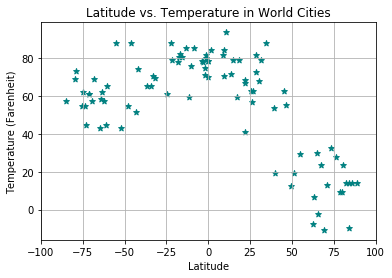

In [20]:
#create scatter plot showing relationship between latitude and temperature

plt.scatter(clean_cities["Latitude"], clean_cities["Temperature"], marker = "*" , color = "teal")
plt.xlim(-100,100)

# Incorporate the other graph properties
plt.title("Temperature vs. Latitude in World Cities")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

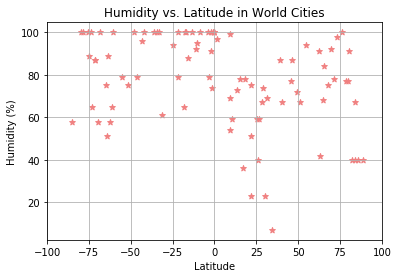

In [23]:
#create scatter plot showing relationship between latitude and humidity

plt.scatter(clean_cities["Latitude"], clean_cities["Humidity"], marker = "*" , color = "lightcoral")
plt.xlim(-100,100)

# Incorporate the other graph properties
plt.title("Humidity vs. Latitude in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


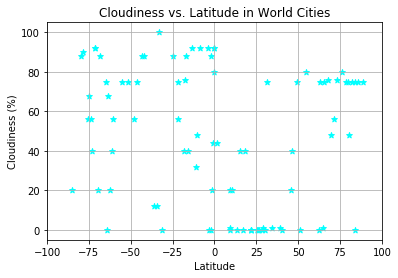

In [25]:
#create scatter plot showing relationship between latitude and temperature

plt.scatter(clean_cities["Latitude"], clean_cities["Cloudiness"], marker = "*" , color = "aqua")
plt.xlim(-100,100)

# Incorporate the other graph properties
plt.title("Cloudiness vs. Latitude in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


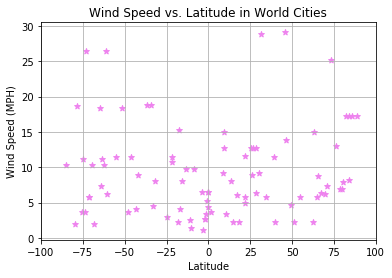

In [26]:
#create scatter plot showing relationship between latitude and temperature

plt.scatter(clean_cities["Latitude"], clean_cities["Wind Speed"], marker = "*" , color = "violet")
plt.xlim(-100,100)

# Incorporate the other graph properties
plt.title("Wind Speed vs. Latitude in World Cities")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)


Observations:

- Latitude appears to have the greatest affect on temperature, as the scatterplot is more closely grouped
- The least cloudy cities appear to be closest to the equator, and there appear to be more cloudy cities in the northern hemisphere
- There are slightly more humid cities in the southern hemisphere